In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load dataset
from google.colab import drive
drive.mount("/drive", force_remount=True)
df = pd.read_csv("/drive/MyDrive/INF2178_A3_data.csv")

# Inspect the dataset
print(df.head())

# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Get summary statistics
summary_statistics = df.describe()
print(summary_statistics)

Mounted at /drive
   fallreadingscore  fallmathscore  fallgeneralknowledgescore  \
0             36.58          39.54                     33.822   
1             50.82          44.44                     38.147   
2             40.68          28.57                     28.108   
3             32.57          23.57                     15.404   
4             31.98          19.65                     18.727   

   springreadingscore  springmathscore  springgeneralknowledgescore  \
0               49.37            50.10                       40.533   
1               83.50            58.93                       37.409   
2               40.41            32.81                       29.312   
3               34.14            35.25                       27.382   
4               32.84            23.60                       26.977   

   totalhouseholdincome  incomeinthousands  incomegroup  
0              140000.0              140.0            3  
1              120000.0              120.0      

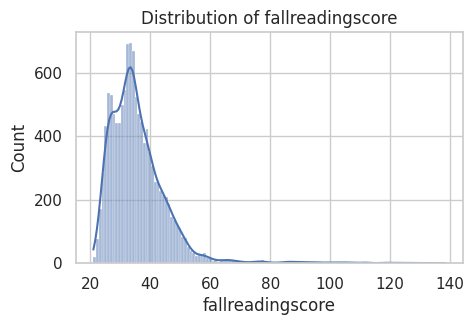

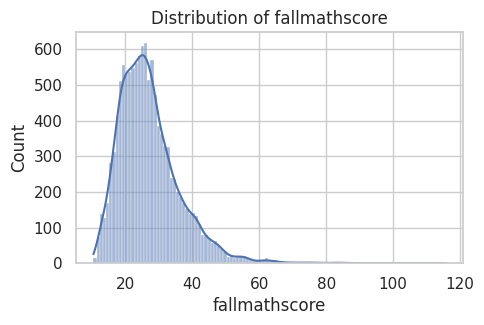

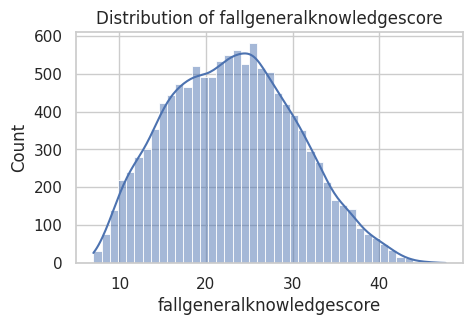

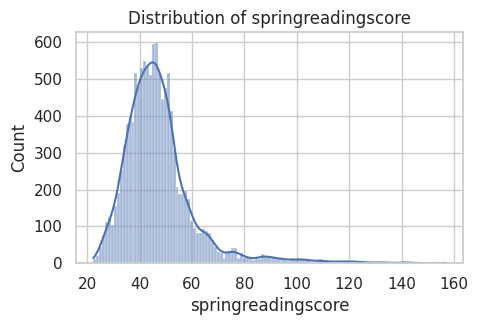

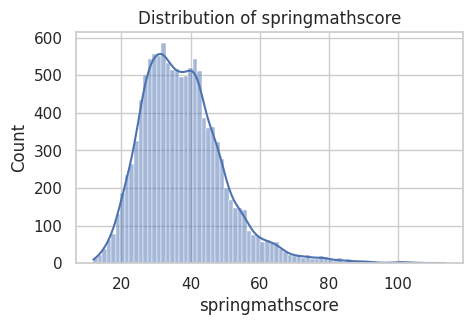

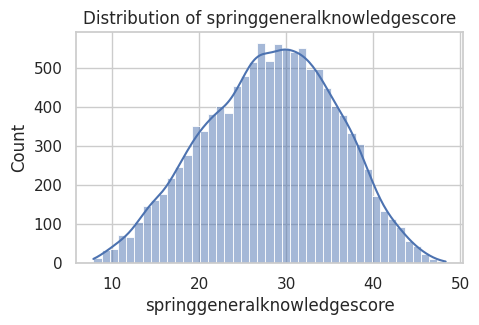

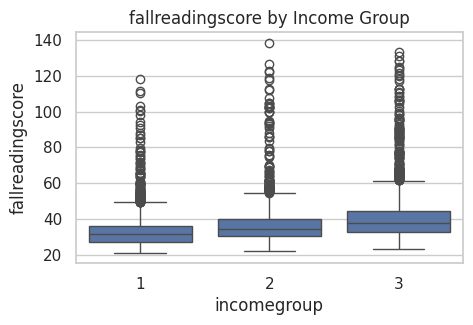

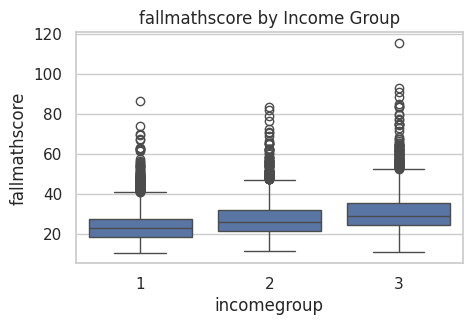

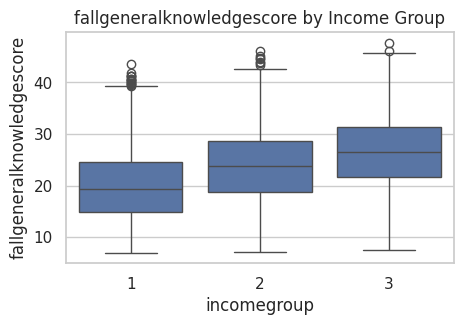

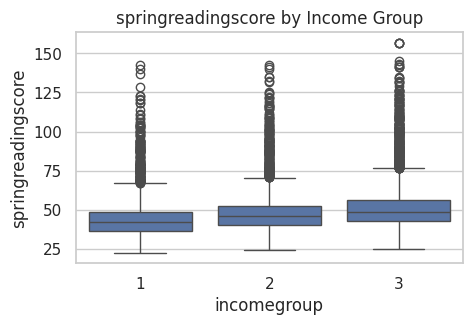

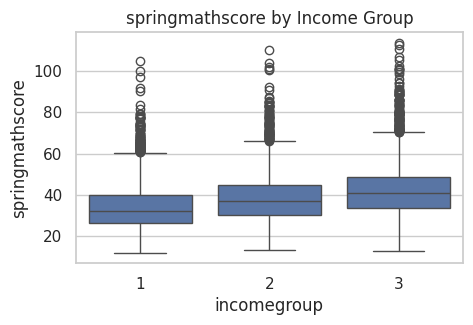

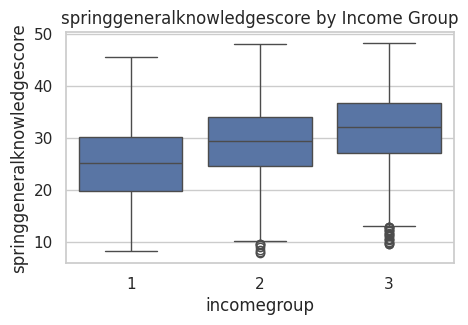

In [47]:
# Define all score columns
score_columns = ['fallreadingscore', 'fallmathscore', 'fallgeneralknowledgescore',
                 'springreadingscore', 'springmathscore', 'springgeneralknowledgescore']

# Plot histograms
for col in score_columns:
    plt.figure(figsize=(5, 3))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Boxplots for scores by income group
for col in score_columns:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x='incomegroup', y=col, data=df)
    plt.title(f'{col} by Income Group')
    plt.show()


<ipython-input-48-63952ac4d60d>:3: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  sns.pointplot(data=df, x='incomegroup', y='fallreadingscore', capsize=0.1, join=True)


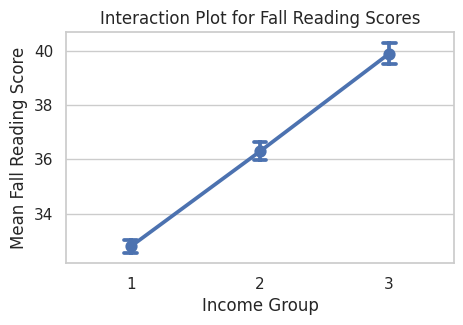

<ipython-input-48-63952ac4d60d>:11: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  sns.pointplot(data=df, x='incomegroup', y='springreadingscore', capsize=0.1, join=True)


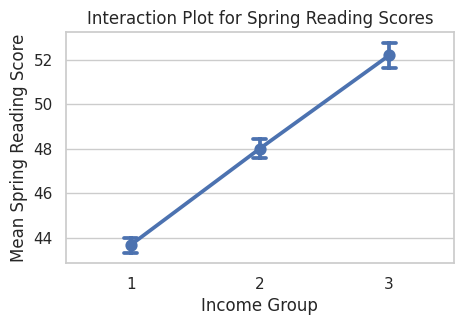

<ipython-input-48-63952ac4d60d>:19: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  sns.pointplot(data=df, x='incomegroup', y='fallmathscore', capsize=0.1, join=True)


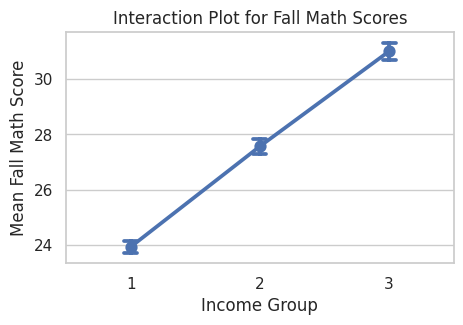

<ipython-input-48-63952ac4d60d>:27: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  sns.pointplot(data=df, x='incomegroup', y='springmathscore', capsize=0.1, join=True)


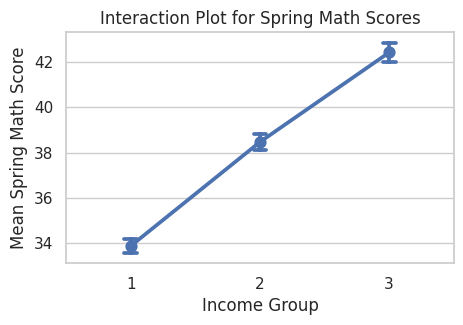

<ipython-input-48-63952ac4d60d>:35: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  sns.pointplot(data=df, x='incomegroup', y='fallgeneralknowledgescore', capsize=0.1, join=True)


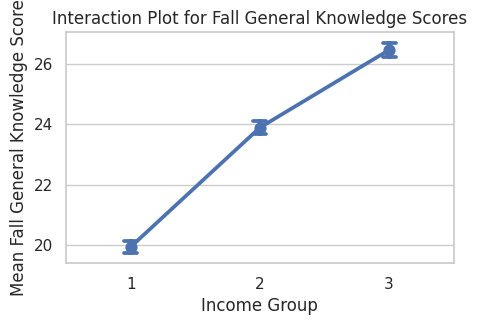

<ipython-input-48-63952ac4d60d>:43: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  sns.pointplot(data=df, x='incomegroup', y='springgeneralknowledgescore', capsize=0.1, join=True)


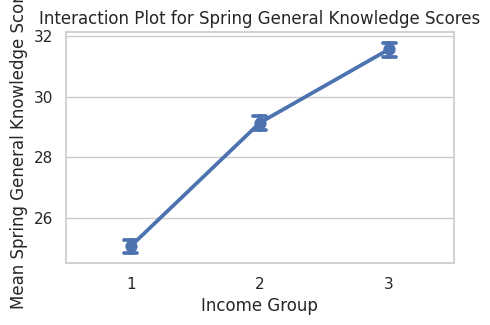

In [48]:
# Interaction Plot for Fall Reading Scores
plt.figure(figsize=(5, 3))
sns.pointplot(data=df, x='incomegroup', y='fallreadingscore', capsize=0.1, join=True)
plt.title('Interaction Plot for Fall Reading Scores')
plt.ylabel('Mean Fall Reading Score')
plt.xlabel('Income Group')
plt.show()

# Interaction Plot for Spring Reading Scores
plt.figure(figsize=(5, 3))
sns.pointplot(data=df, x='incomegroup', y='springreadingscore', capsize=0.1, join=True)
plt.title('Interaction Plot for Spring Reading Scores')
plt.ylabel('Mean Spring Reading Score')
plt.xlabel('Income Group')
plt.show()

# Interaction Plot for Fall Math Scores
plt.figure(figsize=(5, 3))
sns.pointplot(data=df, x='incomegroup', y='fallmathscore', capsize=0.1, join=True)
plt.title('Interaction Plot for Fall Math Scores')
plt.ylabel('Mean Fall Math Score')
plt.xlabel('Income Group')
plt.show()

# Interaction Plot for Spring Math Scores
plt.figure(figsize=(5, 3))
sns.pointplot(data=df, x='incomegroup', y='springmathscore', capsize=0.1, join=True)
plt.title('Interaction Plot for Spring Math Scores')
plt.ylabel('Mean Spring Math Score')
plt.xlabel('Income Group')
plt.show()

# Interaction Plot for Fall General Knowledge Scores
plt.figure(figsize=(5, 3))
sns.pointplot(data=df, x='incomegroup', y='fallgeneralknowledgescore', capsize=0.1, join=True)
plt.title('Interaction Plot for Fall General Knowledge Scores')
plt.ylabel('Mean Fall General Knowledge Score')
plt.xlabel('Income Group')
plt.show()

# Interaction Plot for Spring General Knowledge Scores
plt.figure(figsize=(5, 3))
sns.pointplot(data=df, x='incomegroup', y='springgeneralknowledgescore', capsize=0.1, join=True)
plt.title('Interaction Plot for Spring General Knowledge Scores')
plt.ylabel('Mean Spring General Knowledge Score')
plt.xlabel('Income Group')
plt.show()

In [50]:
# ANCOVA for Spring Reading Scores
model_reading = ols('springreadingscore ~ totalhouseholdincome + fallreadingscore', data=df).fit()
ancova_reading_results = sm.stats.anova_lm(model_reading, typ=2)
print(ancova_reading_results)

# ANCOVA for Spring Math Scores
model_math = ols('springmathscore ~ totalhouseholdincome + fallmathscore', data=df).fit()
ancova_math_results = sm.stats.anova_lm(model_math, typ=2)
print(ancova_math_results)

# ANCOVA for Spring General Knowledge Scores
model_general_knowledge = ols('springgeneralknowledgescore ~ totalhouseholdincome + fallgeneralknowledgescore', data=df).fit()
ancova_general_knowledge_results = sm.stats.anova_lm(model_general_knowledge, typ=2)
print(ancova_general_knowledge_results)


                            sum_sq       df             F    PR(>F)
totalhouseholdincome  6.759577e+02      1.0     10.688633  0.001081
fallreadingscore      1.525127e+06      1.0  24116.185734  0.000000
Residual              7.544627e+05  11930.0           NaN       NaN
                            sum_sq       df             F        PR(>F)
totalhouseholdincome  2.674327e+03      1.0     57.951915  2.888169e-14
fallmathscore         1.003505e+06      1.0  21745.675271  0.000000e+00
Residual              5.505379e+05  11930.0           NaN           NaN
                                  sum_sq       df             F        PR(>F)
totalhouseholdincome         1863.445065      1.0    120.798022  5.761298e-28
fallgeneralknowledgescore  408218.744672      1.0  26462.823002  0.000000e+00
Residual                   184033.639329  11930.0           NaN           NaN


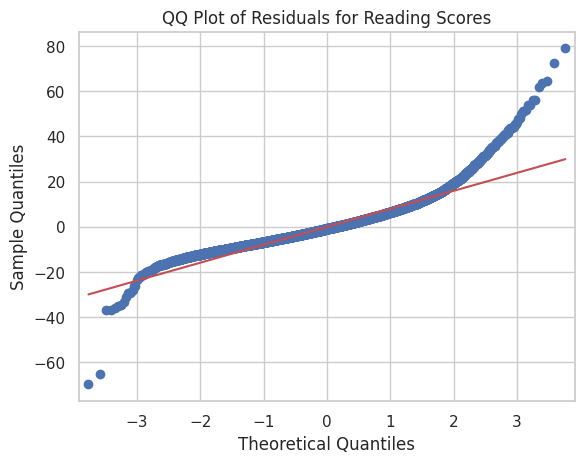

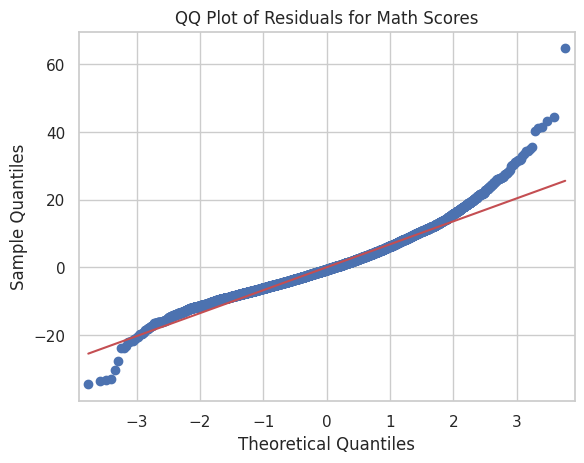

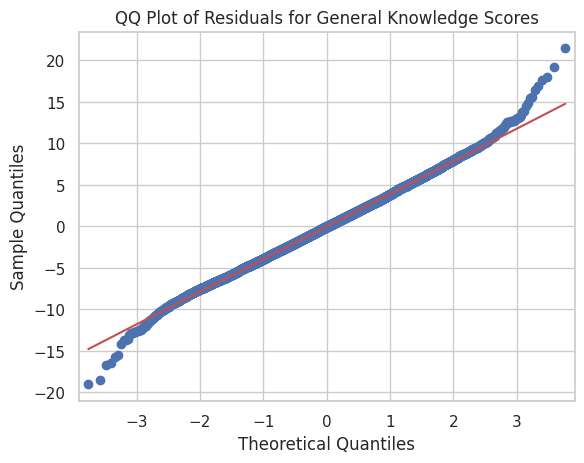

In [58]:
# QQ Plot for Reading Scores Residuals
sm.qqplot(model_reading.resid, line='s')
plt.title('QQ Plot of Residuals for Reading Scores')
plt.show()

# QQ Plot for Math Scores Residuals
sm.qqplot(model_math.resid, line='s')
plt.title('QQ Plot of Residuals for Math Scores')
plt.show()

# QQ Plot for General Knowledge Scores Residuals
sm.qqplot(model_general_knowledge.resid, line='s')
plt.title('QQ Plot of Residuals for General Knowledge Scores')
plt.show()